In [4]:
# Importar librerías 
import pandas as pd
import random
import time
import string
from collections import Counter
import matplotlib.pyplot as plt

# Sembro la semilla con mi rut para resultados reproducibles
rut = 212844594
random.seed(rut)

## Algoritmos de Ordenación

### QuickSort con Mediana de Tres

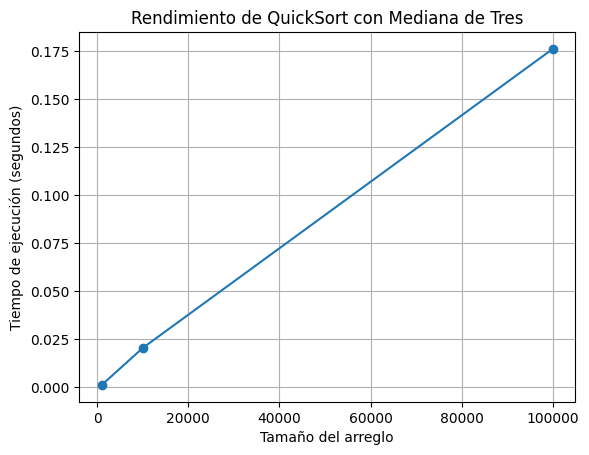

In [5]:
# Función para encontrar la mediana de tres elementos en el arreglo
def mediana_de_tres(arr, bajo, alto):
    """
    Encuentro la mediana de tres elementos en el arreglo: el primero, el del medio y el último.

    Parámetros:
    arr (list): El arreglo de elementos.
    bajo (int): El índice del primer elemento.
    alto (int): El índice del último elemento.

    Retorna:
    int: El índice del elemento que es la mediana de los tres.
    """
    medio = (bajo + alto) // 2
    # Selecciono tres elementos: el primero, el del medio y el último
    candidatos_pivote = [(arr[bajo], bajo), (arr[medio], medio), (arr[alto], alto)]
    # Ordeno estos elementos para sacar el de en medio (la mediana)
    candidatos_pivote.sort(key=lambda x: x[0])
    return candidatos_pivote[1][1]  # Devuelvo el índice del pivote (la mediana)

# Función para particionar el arreglo
def particion(arr, bajo, alto):
    """
    Particiono el arreglo usando el último elemento como pivote.

    Parámetros:
    arr (list): El arreglo que estoy procesando.
    bajo (int): Índice inicial del subarreglo.
    alto (int): Índice final del subarreglo.

    Retorna:
    int: El índice donde quedó el pivote después de la partición.
    """
    pivote = arr[alto]  # Tomo el último elemento como pivote
    i = bajo - 1  # Índice de los elementos menores que el pivote
    for j in range(bajo, alto):
        if arr[j] <= pivote:
            i += 1
            # Intercambio los elementos para mover los más pequeños hacia la izquierda
            arr[i], arr[j] = arr[j], arr[i]
    # Coloco el pivote en su posición correcta
    arr[i + 1], arr[alto] = arr[alto], arr[i + 1]
    return i + 1

# Función principal de QuickSort con mediana de tres
def quicksort_mediana_de_tres(arr, bajo, alto):
    """
    Ordeno una lista usando QuickSort con la técnica de mediana de tres para elegir el pivote.

    Parámetros:
    arr (list): Lista de elementos a ordenar.
    bajo (int): Índice inicial del subarreglo.
    alto (int): Índice final del subarreglo.

    Retorna:
    None: La lista se ordena en su lugar.
    """
    if bajo < alto:
        # Uso mediana de tres para calcular el pivote
        indice_pivote = mediana_de_tres(arr, bajo, alto)
        # Muevo el pivote al final (como espera la función particion)
        arr[indice_pivote], arr[alto] = arr[alto], arr[indice_pivote]
        # Particiono el arreglo en dos subarreglos
        pivote = particion(arr, bajo, alto)
        # Llamo a QuickSort recursivamente en las dos mitades
        quicksort_mediana_de_tres(arr, bajo, pivote - 1)
        quicksort_mediana_de_tres(arr, pivote + 1, alto)

# Función auxiliar para medir el tiempo de ejecución del QuickSort
def medir_tiempo(arr):
    """
    Mido cuánto tarda en ejecutarse QuickSort con mediana de tres.

    Parámetros:
    arr (list): Lista de elementos a ordenar.

    Retorna:
    float: Tiempo de ejecución en segundos.
    """
    inicio = time.time()
    quicksort_mediana_de_tres(arr, 0, len(arr) - 1)
    fin = time.time()
    return fin - inicio

# Pruebas experimentales con arreglos de diferentes tamaños
tamaños = [10**3, 10**4, 10**5]  # Tamaños de prueba: 1,000, 10,000 y 100,000 elementos
tiempos_ejecucion = []

for tamaño in tamaños:
    # Creo un arreglo con números aleatorios entre 0 y 1,000,000
    arreglo_prueba = [random.randint(0, 10**6) for _ in range(tamaño)]
    # Copio el arreglo antes de medir para no afectar las siguientes pruebas
    tiempo_tomado = medir_tiempo(arreglo_prueba.copy())
    tiempos_ejecucion.append(tiempo_tomado)

# Graficar los resultados
plt.plot(tamaños, tiempos_ejecucion, marker='o')
plt.title("Rendimiento de QuickSort con Mediana de Tres")
plt.xlabel("Tamaño del arreglo")
plt.ylabel("Tiempo de ejecución (segundos)")
plt.grid()
plt.show()

### Radix Sort

In [6]:
# Este es el Counting Sort que uso dentro de Radix Sort. Lo adapté para trabajar con strings.
def counting_sort(arr, exp):
    """
    Aplico el algoritmo Counting Sort sobre un arreglo de strings, usando un dígito (o carácter) específico.

    Parámetros:
    arr (list): Lista de strings que quiero ordenar.
    exp (int): Índice del carácter en los strings que se usará como referencia para el orden.

    Retorna:
    None: El arreglo se modifica directamente.
    """
    n = len(arr)
    output = [""] * n  # Aquí voy guardando el resultado ordenado
    count = [0] * 256  # Rango para caracteres ASCII (256 posibles)

    # Paso 1: Contar las ocurrencias de cada carácter
    for s in arr:
        # Uso ord() para obtener el código ASCII del carácter, o 0 si el índice no existe
        index = ord(s[exp]) if exp < len(s) else 0
        count[index] += 1

    # Paso 2: Calcular las posiciones acumuladas en el arreglo count
    for i in range(1, 256):
        count[i] += count[i - 1]

    # Paso 3: Construyo el arreglo ordenado de forma estable (mantengo el orden de entrada si hay empates)
    for s in reversed(arr):  # Voy de atrás hacia adelante porque me ayuda con la estabilidad
        index = ord(s[exp]) if exp < len(s) else 0
        output[count[index] - 1] = s
        count[index] -= 1

    # Paso 4: Copio los resultados ordenados de nuevo al arreglo original
    for i in range(n):
        arr[i] = output[i]

# Aquí va el Radix Sort, que aprovecha Counting Sort para ordenar strings alfanuméricos.
def radix_sort(arr):
    """
    Ordena una lista de strings usando Radix Sort, trabajando carácter por carácter.

    Parámetros:
    arr (list): Lista de strings que quiero ordenar.

    Retorna:
    None: El arreglo se ordena directamente.
    """
    max_len = len(max(arr, key=len))  # Encuentro el string más largo para saber cuántos pasos hacer
    # Ordeno empezando desde el último carácter (menos significativo)
    for exp in range(max_len - 1, -1, -1):
        counting_sort(arr, exp)  # Llamo a mi función Counting Sort para cada posición

# Genero una lista de 10,000 strings aleatorios (mezcla de letras y números)
random_strings = [
    ''.join(random.choices(string.ascii_letters + string.digits, k=random.randint(1, 20)))
    for _ in range(10000)
]

# Mido el tiempo de ejecución del Radix Sort
start_time = time.time()
radix_sort(random_strings)
end_time = time.time()

# Imprimo el tiempo que tomó ordenar
print(f"Tiempo de ejecución: {end_time - start_time:.4f} segundos")

# Verifico si la lista quedó ordenada correctamente
is_sorted = all(random_strings[i] <= random_strings[i + 1] for i in range(len(random_strings) - 1))
print("Lista ordenada correctamente:", is_sorted)

# Muestro los primeros 100 elementos para una revisión rápida
print(random_strings[:100])

# Verificación adicional: reviso si hay algún error en el orden
for i in range(len(random_strings) - 1):
    if random_strings[i] > random_strings[i + 1]:
        # Si encuentro un error, lo reporto
        print(f"Error de orden en las posiciones {i} y {i + 1}: {random_strings[i]} > {random_strings[i + 1]}")
        break
else:
    # Si todo está bien, lo confirmo
    print("La lista está correctamente ordenada.")


Tiempo de ejecución: 0.0455 segundos
Lista ordenada correctamente: True
['0', '0', '0', '0', '0', '0', '0', '0', '0', '008YzDjm', '00WKMAxErhebJdJmFF', '00WNnAE', '030', '04EyFCKiPQpsUxE', '055dbVset2Tm', '05CctBjDO5hqOml1aS', '05gwNPEaC20qYovvj8', '05jS8KYBHCSv', '05nJzr9ELLoGnQqA', '05rjF6RCiIKDXaxen6id', '05zHfNcXde', '06m9y2', '07o', '07y', '08QTecirm7lzNVw6F', '08W6Nhfiey', '09qNMW', '0AZgdH', '0Az7PXLixu8', '0BomuXDGLT4b3yDd', '0D07ivX9YFA1Yh', '0D5wr1LXR', '0DzNIqiYeKSx', '0FB26hDuivOUspnWR', '0Fmg3mqOujjNWcUQb', '0G', '0G9u6', '0GTb90IjygEWsC', '0GVEIN', '0HBEa', '0HmJPK6H5QVZS', '0IEEzW2ofQPIXWFp', '0IKKn', '0IOxYvD1ft', '0JF', '0Jf5rwPu6lm9E', '0KAaR', '0KjmcU1QI802nP', '0LMxOMs1W', '0LNl0jE', '0LXkXRWRDvtwrrJVTR', '0MO0PqOuIRU0', '0MPTuJkH8CvpdmNfv', '0MeF9Sl4', '0Ms912RN', '0NX2XZ', '0NZfeX9ZJ1AesYSw1LNK', '0OLQWzTqKjDiQamhR7Yx', '0ONymeKCzfJtH8rOP0jW', '0ORzSCFEV0w54WYjjaj', '0POwPv3', '0Pn8SzuG9V6alC', '0PtGuom2Q', '0PuxGJPtEzv29Z', '0QiJfVQKvj13ApdzE3', '0R5v46xcKn0m7k0H

### CombSort

Tiempo de ejecución de CombSort: 0.001992 segundos
Tiempo de ejecución de Bubble Sort: 0.040841 segundos
CombSort correcto: True
Bubble Sort correcto: True


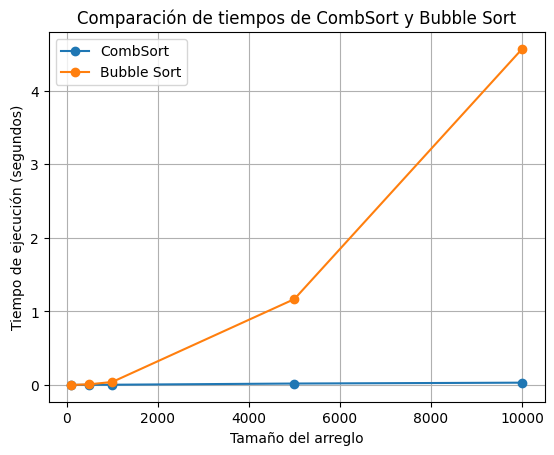

In [7]:
# Implementación de CombSort
def comb_sort(arr):
    """
    Ordeno un arreglo usando CombSort. Este algoritmo mejora el Bubble Sort
    al comparar elementos más alejados al inicio.

    Parámetros:
    arr (list): Lista de elementos a ordenar.

    Retorna:
    None: Ordena la lista en su lugar.
    """
    n = len(arr)
    gap = n
    shrink = 1.3  # Factor de reducción del gap (me funcionó bien con 1.3)
    sorted_flag = False  # Bandera para verificar si ya está ordenado

    # Mientras el gap sea mayor a 1 o el arreglo no esté ordenado
    while not sorted_flag:
        gap = int(gap / shrink)
        if gap < 1:
            gap = 1

        sorted_flag = True  # Asumo que está ordenado, pero verifico
        i = 0
        while i + gap < n:  # Comparo elementos separados por el gap actual
            if arr[i] > arr[i + gap]:
                # Intercambio si están desordenados
                arr[i], arr[i + gap] = arr[i + gap], arr[i]
                sorted_flag = False  # Hubo un intercambio, entonces no está ordenado
            i += 1

# Implementación de Bubble Sort
def bubble_sort(arr):
    """
    Ordeno un arreglo usando Bubble Sort. Es simple, pero no muy eficiente
    para listas grandes.

    Parámetros:
    arr (list): Lista de elementos a ordenar.

    Retorna:
    None: Ordena la lista en su lugar.
    """
    n = len(arr)
    for i in range(n):
        swapped = False  # Bandera para saber si hubo intercambios
        for j in range(0, n - i - 1):
            if arr[j] > arr[j + 1]:
                # Intercambio los elementos si están desordenados
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
                swapped = True
        if not swapped:
            break  # Si no hubo intercambios, ya está ordenado

# Función para medir el tiempo de ejecución de un algoritmo
def measure_time(sort_function, arr):
    """
    Mido cuánto tarda en ejecutarse un algoritmo de ordenamiento.

    Parámetros:
    sort_function (func): Algoritmo de ordenamiento a medir.
    arr (list): Lista de elementos a ordenar.

    Retorna:
    float: Tiempo de ejecución en segundos.
    """
    start_time = time.time()
    sort_function(arr)
    end_time = time.time()
    return end_time - start_time

# Creo una lista de 1,000 números aleatorios para las pruebas
test_data = [random.randint(0, 1000000) for _ in range(1000)]

# Copias del arreglo para cada algoritmo
data_comb = test_data.copy()
data_bubble = test_data.copy()

# Medir el tiempo de ejecución de CombSort
comb_sort_time = measure_time(comb_sort, data_comb)

# Medir el tiempo de ejecución de Bubble Sort
bubble_sort_time = measure_time(bubble_sort, data_bubble)

# Verificar resultados
print(f"Tiempo de ejecución de CombSort: {comb_sort_time:.6f} segundos")
print(f"Tiempo de ejecución de Bubble Sort: {bubble_sort_time:.6f} segundos")
print("CombSort correcto:", data_comb == sorted(test_data))
print("Bubble Sort correcto:", data_bubble == sorted(test_data))

# Visualización de los resultados
sizes = [100, 500, 1000, 5000, 10000]  # Diferentes tamaños de prueba
comb_times = []
bubble_times = []

for size in sizes:
    # Genero arreglos aleatorios para cada tamaño
    test_data = [random.randint(0, 1000000) for _ in range(size)]
    comb_times.append(measure_time(comb_sort, test_data.copy()))
    bubble_times.append(measure_time(bubble_sort, test_data.copy()))

# Graficar los resultados
plt.plot(sizes, comb_times, label="CombSort", marker='o')
plt.plot(sizes, bubble_times, label="Bubble Sort", marker='o')
plt.title("Comparación de tiempos de CombSort y Bubble Sort")
plt.xlabel("Tamaño del arreglo")
plt.ylabel("Tiempo de ejecución (segundos)")
plt.legend()
plt.grid()
plt.show()


## Funciones de Hash

### Tabla Hash con Resolución de Colisiones por Doble Hashing

In [8]:
# Implementación de tabla hash con doble hashing
class DoubleHashingHashTable:
    def __init__(self, size):
        """
        Inicializo la tabla hash con doble hashing.

        Parámetros:
        size (int): Tamaño de la tabla hash.
        """
        self.size = size
        self.table = [None] * size  # Inicializo la tabla con None
        self.deleted = object()  # Sentinel para marcar elementos eliminados

    def primary_hash(self, key):
        """
        Cálculo del hash primario.

        Parámetros:
        key: Llave a hashear.

        Retorna:
        int: Índice calculado por el hash primario.
        """
        return hash(key) % self.size

    def secondary_hash(self, key):
        """
        Cálculo del hash secundario para manejar colisiones.

        Parámetros:
        key: Llave a hashear.

        Retorna:
        int: Paso calculado para el hash secundario.
        """
        return 1 + (hash(key) % (self.size - 1))

    def insert(self, key, value):
        """
        Inserto un elemento en la tabla hash.

        Parámetros:
        key: Llave del elemento.
        value: Valor asociado a la llave.
        """
        index = self.primary_hash(key)  # Índice inicial
        step = self.secondary_hash(key)  # Paso para resolver colisiones
        # Busco un espacio vacío o reutilizable
        while self.table[index] is not None and self.table[index] is not self.deleted:
            index = (index + step) % self.size
        self.table[index] = (key, value)

    def search(self, key):
        """
        Busco un valor en la tabla hash por su llave.

        Parámetros:
        key: Llave del elemento.

        Retorna:
        value: Valor asociado a la llave o None si no existe.
        """
        index = self.primary_hash(key)
        step = self.secondary_hash(key)
        # Itero hasta encontrar el elemento o llegar a un espacio vacío
        while self.table[index] is not None:
            if self.table[index] is not self.deleted and self.table[index][0] == key:
                return self.table[index][1]
            index = (index + step) % self.size
        return None

    def delete(self, key):
        """
        Elimino un elemento de la tabla hash por su llave.

        Parámetros:
        key: Llave del elemento.

        Retorna:
        bool: True si se eliminó, False si no se encontró.
        """
        index = self.primary_hash(key)
        step = self.secondary_hash(key)
        while self.table[index] is not None:
            if self.table[index] is not self.deleted and self.table[index][0] == key:
                self.table[index] = self.deleted  # Marco como eliminado
                return True
            index = (index + step) % self.size
        return False

# Implementación de tabla hash con encadenamiento
class ChainingHashTable:
    def __init__(self, size):
        """
        Inicializo la tabla hash con encadenamiento.

        Parámetros:
        size (int): Tamaño de la tabla hash.
        """
        self.size = size
        self.table = [[] for _ in range(size)]  # Cada índice tiene una lista vacía

    def hash(self, key):
        """
        Calculo el índice hash.

        Parámetros:
        key: Llave a hashear.

        Retorna:
        int: Índice calculado por el hash.
        """
        return hash(key) % self.size

    def insert(self, key, value):
        """
        Inserto un elemento en la tabla hash.

        Parámetros:
        key: Llave del elemento.
        value: Valor asociado a la llave.
        """
        index = self.hash(key)
        # Si la llave ya existe, actualizo su valor
        for i, (k, v) in enumerate(self.table[index]):
            if k == key:
                self.table[index][i] = (key, value)
                return
        self.table[index].append((key, value))  # Agrego un nuevo par (key, value)

    def search(self, key):
        """
        Busco un valor en la tabla hash por su llave.

        Parámetros:
        key: Llave del elemento.

        Retorna:
        value: Valor asociado a la llave o None si no existe.
        """
        index = self.hash(key)
        # Recorro la lista en el índice correspondiente
        for k, v in self.table[index]:
            if k == key:
                return v
        return None

    def delete(self, key):
        """
        Elimino un elemento de la tabla hash por su llave.

        Parámetros:
        key: Llave del elemento.

        Retorna:
        bool: True si se eliminó, False si no se encontró.
        """
        index = self.hash(key)
        for i, (k, v) in enumerate(self.table[index]):
            if k == key:
                del self.table[index][i]  # Borro el par (key, value) de la lista
                return True
        return False

In [9]:
# Genero operaciones de prueba optimizadas
def random_string(length=10):
    return ''.join(random.choices(string.ascii_letters + string.digits, k=length))

keys = [random_string() for _ in range(1000)]
operations = [('insert', key, random.randint(0, 1000)) for key in keys]
operations += [('search', key, None) for key in keys]
operations += [('delete', key, None) for key in keys]

# Evaluación de eficiencia
def measure_performance(hash_table_class, size, operations):
    hash_table = hash_table_class(size)
    start_time = time.time()
    for op, key, value in operations:
        if op == 'insert':
            hash_table.insert(key, value)
        elif op == 'search':
            hash_table.search(key)
        elif op == 'delete':
            hash_table.delete(key)
    end_time = time.time()
    return end_time - start_time

size = 3000
# Medir el rendimiento de Double Hashing
double_hashing_time = measure_performance(DoubleHashingHashTable, size, operations)
# Medir el rendimiento de Encadenamiento
chaining_time = measure_performance(ChainingHashTable, size, operations)

# Resultados
print(f"Double Hashing Time: {double_hashing_time:.6f} seconds")
print(f"Chaining Time: {chaining_time:.6f} seconds")

Double Hashing Time: 0.002995 seconds
Chaining Time: 0.003088 seconds


### Función de Hash para Comparación de Textos

In [10]:
# Función para calcular el hash de una línea usando Rolling Hash
def rolling_hash(line, base=256, prime=101):
    """
    Calcula el hash de una línea utilizando el método Rolling Hash.

    Parámetros:
    line (str): Línea de texto.
    base (int): Base para el cálculo del hash (por defecto 256).
    prime (int): Número primo para reducir colisiones (por defecto 101).

    Retorna:
    int: Hash calculado.
    """
    h = 0
    for char in line:
        # Acá multiplico el hash actual por la base y sumo el valor ASCII del carácter
        h = (h * base + ord(char)) % prime
    return h

# Detección de líneas duplicadas usando Rolling Hash
def detect_duplicates_rolling(file_path):
    """
    Detecta líneas duplicadas en un archivo de texto utilizando Rolling Hash.

    Parámetros:
    file_path (str): Ruta del archivo a analizar.

    Retorna:
    set: Conjunto de líneas duplicadas.
    """
    base = 256
    prime = 101
    hashes = set()  # Almaceno los hashes únicos aquí
    duplicates = set()  # Y acá las líneas duplicadas

    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            line = line.strip()  # Quito espacios extra y saltos de línea
            h = rolling_hash(line, base, prime)
            if h in hashes:
                duplicates.add(line)  # Si el hash ya está, es duplicado
            else:
                hashes.add(h)

    return duplicates

# Detección de líneas duplicadas usando el hash nativo de Python
def detect_duplicates_simple(file_path):
    """
    Detecta líneas duplicadas en un archivo de texto utilizando el hash simple de Python.

    Parámetros:
    file_path (str): Ruta del archivo a analizar.

    Retorna:
    set: Conjunto de líneas duplicadas.
    """
    hashes = set()  # Aquí guardo los hashes únicos
    duplicates = set()  # Aquí guardo las líneas duplicadas

    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            line = line.strip()
            h = hash(line)  # Uso el hash nativo
            if h in hashes:
                duplicates.add(line)
            else:
                hashes.add(h)

    return duplicates

# Generar un archivo de prueba con texto
def generate_test_file(file_path, num_lines=100000):
    """
    Genera un archivo de prueba con texto aleatorio, incluyendo duplicados.

    Parámetros:
    file_path (str): Ruta del archivo a generar.
    num_lines (int): Número total de líneas en el archivo.
    """
    with open(file_path, 'w', encoding='utf-8') as file:
        lines = set()
        # Genero la mitad de las líneas como únicas
        for _ in range(num_lines // 2):
            line = ''.join(random.choices(string.ascii_letters + string.digits, k=50))
            lines.add(line)
        # Escribo las líneas únicas en el archivo
        for line in lines:
            file.write(line + '\n')
        # Agrego duplicados tomando muestras de las líneas únicas
        for line in random.sample(list(lines), len(lines) // 2):
            file.write(line + '\n')

# Medir el tiempo de ejecución de una función
def measure_time(function, file_path):
    """
    Mide el tiempo de ejecución de una función de detección de duplicados.

    Parámetros:
    function (func): Función a medir.
    file_path (str): Ruta del archivo a procesar.

    Retorna:
    tuple: Conjunto de duplicados detectados y tiempo de ejecución en segundos.
    """
    start_time = time.time()
    duplicates = function(file_path)
    end_time = time.time()
    return duplicates, end_time - start_time

# Generar un archivo grande para pruebas (mínimo 1 MB)
file_path = 'large_text_file.txt'
generate_test_file(file_path, num_lines=100000)

# Detectar duplicados con Rolling Hash
duplicates_rolling, rolling_time = measure_time(detect_duplicates_rolling, file_path)

# Detectar duplicados con Hash Simple
duplicates_simple, simple_time = measure_time(detect_duplicates_simple, file_path)

# Mostrar resultados
print(f"Rolling Hash Time: {rolling_time:.6f} segundos")
print(f"Simple Hash Time: {simple_time:.6f} segundos")
print(f"Número de duplicados detectados (Rolling): {len(duplicates_rolling)}")
print(f"Número de duplicados detectados (Simple): {len(duplicates_simple)}")

Rolling Hash Time: 0.308288 segundos
Simple Hash Time: 0.030439 segundos
Número de duplicados detectados (Rolling): 49950
Número de duplicados detectados (Simple): 25000


### Hash de Conteo de Elementos con Alta Frecuencia

In [ ]:
# Generar una lista grande con elementos aleatorios
def generate_large_list(size=100000, unique_elements=1000):
    """
    Genero una lista con "size" elementos, donde los valores se repiten y 
    son seleccionados de "unique_elements" posibles valores.

    Parámetros:
    size (int): Tamaño total de la lista.
    unique_elements (int): Número de valores únicos posibles.

    Retorna:
    list: Lista de tamaño "size" con valores repetidos.
    """
    return [random.choice(range(unique_elements)) for _ in range(size)]

# Tabla hash personalizada para contar elementos
def count_with_hash(elements):
    """
    Cuento las frecuencias de los elementos usando una tabla hash personalizada.

    Parámetros:
    elements (list): Lista de elementos a contar.

    Retorna:
    dict: Diccionario con los elementos y sus frecuencias.
    """
    frequency = {}
    for element in elements:
        if element in frequency:
            frequency[element] += 1  # Si ya existe, incremento el contador
        else:
            frequency[element] = 1  # Si no existe, lo inicializo en 1
    return frequency

# Usar Counter para contar elementos
def count_with_counter(elements):
    """
    Cuento las frecuencias de los elementos usando collections.Counter.

    Parámetros:
    elements (list): Lista de elementos a contar.

    Retorna:
    Counter: Objeto Counter con los elementos y sus frecuencias.
    """
    return Counter(elements)

# Medir el tiempo de ejecución
def measure_time(function, *args):
    """
    Mido el tiempo de ejecución de una función dada.

    Parámetros:
    function (callable): Función a medir.
    *args: Argumentos para la función.

    Retorna:
    tuple: Resultado de la función y tiempo de ejecución en segundos.
    """
    start_time = time.time()
    result = function(*args)
    end_time = time.time()
    return result, end_time - start_time

# Obtener los elementos más frecuentes
def get_most_common(frequency_dict, top_n=10):
    """
    Obtengo los "top_n" elementos más frecuentes de un diccionario de frecuencias.

    Parámetros:
    frequency_dict (dict): Diccionario con elementos y sus frecuencias.
    top_n (int): Número de elementos más frecuentes a devolver.

    Retorna:
    list: Lista de los "top_n" elementos más frecuentes y sus frecuencias.
    """
    return sorted(frequency_dict.items(), key=lambda x: x[1], reverse=True)[:top_n]

# Generar lista de prueba
elements = generate_large_list(size=100000, unique_elements=1000)

# Contar frecuencias con tabla hash personalizada
hash_result, hash_time = measure_time(count_with_hash, elements)

# Contar frecuencias con Counter
counter_result, counter_time = measure_time(count_with_counter, elements)

# Obtener los 10 elementos más frecuentes
most_common_hash = get_most_common(hash_result, top_n=10)
most_common_counter = counter_result.most_common(10)

# Resultados
print(f"Tiempo con tabla hash personalizada: {hash_time:.6f} segundos")
print(f"Tiempo con Counter: {counter_time:.6f} segundos")
print("\nElementos más frecuentes (Tabla Hash):")
print(most_common_hash)
print("\nElementos más frecuentes (Counter):")
print(most_common_counter)


Tiempo con tabla hash personalizada: 0.008926 segundos
Tiempo con Counter: 0.003601 segundos

Elementos más frecuentes (Tabla Hash):
[(787, 133), (579, 132), (100, 130), (135, 128), (250, 128), (452, 128), (542, 127), (89, 126), (624, 126), (316, 125)]

Elementos más frecuentes (Counter):
[(787, 133), (579, 132), (100, 130), (135, 128), (250, 128), (452, 128), (542, 127), (89, 126), (624, 126), (316, 125)]
